#### 머신러닝 프로젝트
- 데이터셋 : used_car_data.csv
- 목표 : 다양한 모델로 데이터셋 분석 및 모델 생성.



In [2]:
## [1-1] 모듈로딩 
from _utils import tools as ts, RegressionModule as rm
from _utils.RegressionModule import RegressionModule as rm

import seaborn as sns
import pandas as pd # 데이터 분석 및 전처리
import numpy as np # 숫자처리
import matplotlib.pyplot as plt # 데이터 시각화
from sklearn.linear_model import LinearRegression ## ML 알고리즘
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
                            ## 성능평가 모듈
from sklearn.model_selection import train_test_split, KFold
                            ## 데이터셋 분리 관련 모듈
                            ## 학습/검증/테스트 
                                                    ## 교차검증\
from sklearn.preprocessing import PolynomialFeatures # 폴리. 컬럼추가
from sklearn.linear_model import Ridge, Lasso, ElasticNet                                           

In [3]:
originDF = pd.DataFrame(pd.read_csv('../data/used_cars_data.csv',index_col='S.No.'))

In [4]:
carDF = originDF.copy()

컬럼설명<hr>
S.No.: 차량의 일련 번호 <br>
Name: 차량의 이름 (브랜드 이름과 모델 이름 포함)<br>
Location: 차량이 판매되거나 구매 가능한 위치 (도시)<br>
Year: 차량의 제조 연도<br>
Kilometers_driven: 이전 소유자가 차량을 운전한 총 거리 (KM 단위)<br>
Fuel_Type: 차량이 사용하는 연료 종류 (가솔린, 디젤, 전기, CNG, LPG)<br>
Transmission: 차량에 사용된 변속기 종류 (자동/수동)<br>
Owner: 차량의 소유 유형<br>
Mileage: 자동차 회사가 제공하는 표준 연비 (kmpl 또는 km/kg 단위)<br>
Engine: 차량 엔진의 배기량 (CC 단위)<br>
Power: 차량 엔진의 최대 출력 (bhp 단위)<br>
Seats: 차량의 좌석 수<br>
New_Price: 동일 모델의 새 차량 가격 (인도 루피 Lakhs 단위, 1 Lakh = 100,000 INR)<br>
Price: 중고차 가격 (인도 루피 Lakhs 단위, 1 Lakh = 100,000 INR<br>

In [5]:
aList = carDF[carDF['New_Price'].isna()]['Name'].unique().tolist()
with open('keyword', "w") as f:
      for item in aList:
        f.write(str(item) + "\n")  # Convert item to string and add newline

In [91]:
# 환율 (예시: 1 INR = 15 KRW)
exchange_rate = 16.75

# 중고차 가격을 한국 원화로 변환 후 백만 원 단위로 변환
carDF['Price'] = (carDF['Price'] * 100000 * exchange_rate) / 1000000

# # 결과 출력
print(carDF[['Price']])

          Price
S.No.          
0       2.93125
1      20.93750
2       7.53750
3      10.05000
4      29.71450
...         ...
7248        NaN
7249        NaN
7250        NaN
7251        NaN
7252        NaN

[7078 rows x 1 columns]


In [6]:
carDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


In [7]:
carDF.shape

(7253, 13)

In [8]:
## 각 컬럼별 고유값 갯수 확인
## 범주형, 연속형 데이터 확인
for i in carDF.columns:
    print(i, len(carDF[i].unique()))

Name 2041
Location 11
Year 23
Kilometers_Driven 3660
Fuel_Type 5
Transmission 2
Owner_Type 4
Mileage 451
Engine 151
Power 387
Seats 10
New_Price 626
Price 1374


In [9]:
carDF.isna().sum()
## 널값 상태 확인
## mileeage, Engine, Seats
## engine nan == power 도 없음 46 개이므로 폐기
## New_Price            6247가 null 폐기
## price 1234개는 추후 확인

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [10]:
carDF = carDF.drop(index = carDF[carDF['Engine'].isna()].index)
carDF.loc[carDF['Seats'].isna(),'Seats'] = [5,5,5,7,5,5,5]
carDF.loc[carDF['Mileage'].isna(), 'Mileage'] = [0,0]

In [11]:
## name 컬럼 앞의 회사명은 범주형으로 사용가능.

In [12]:
carDF.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [13]:
## 수치지만 object인 컬럼 수정
# carDF['Mileage'] = carDF['Mileage'].apply(lambda x: x.split())
carDF['Mileage'] = carDF['Mileage'].apply(lambda x: str(x).split()[0] if isinstance(x, str) else x)
carDF["Engine"] = carDF["Engine"].apply(lambda x: str(x).split()[0])
carDF["Power"] = carDF["Power"].apply(lambda x: str(x).split()[0])


In [14]:
carDF.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            6201
Price                1224
dtype: int64

In [15]:
carDF= carDF.drop(index=carDF[carDF['Power']=='null'].index)

In [16]:
#converting object data type to category data type
carDF["Fuel_Type"] = carDF["Fuel_Type"].astype("category")
carDF["Transmission"] = carDF["Transmission"].astype("category")
carDF["Owner_Type"] = carDF["Owner_Type"].astype("category")
#converting datatype  
carDF["Mileage"] = carDF["Mileage"].astype(float)
carDF["Power"] = carDF["Power"].astype(float)
carDF["Engine"]=carDF["Engine"].astype(float)

In [17]:
carDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7078 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7078 non-null   object  
 1   Location           7078 non-null   object  
 2   Year               7078 non-null   int64   
 3   Kilometers_Driven  7078 non-null   int64   
 4   Fuel_Type          7078 non-null   category
 5   Transmission       7078 non-null   category
 6   Owner_Type         7078 non-null   category
 7   Mileage            7078 non-null   float64 
 8   Engine             7078 non-null   float64 
 9   Power              7078 non-null   float64 
 10  Seats              7078 non-null   float64 
 11  New_Price          1006 non-null   object  
 12  Price              5876 non-null   float64 
dtypes: category(3), float64(5), int64(2), object(3)
memory usage: 629.5+ KB


In [18]:
## 차량 이름 앞의 브랜드명 추출하여 브랜드로, 모델명 추출하여 모델로
carDF['Brand'] = carDF['Name'].str.split(' ').str[0] #Separating Brand name from the Name
carDF['Model'] = carDF['Name'].str.split(' ').str[1] + carDF['Name'].str.split(' ').str[2]

carDF.Brand.unique()
## 'Isuzu', 'ISUZU' 같은걸로 보임.

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley', 'Lamborghini',
       'OpelCorsa'], dtype=object)

In [19]:
carDF['Brand'] = carDF['Brand'].str.replace('ISUZU','Isuzu' )
carDF.loc[carDF['Model'].isna(),'Model'] = 'Corsa'

In [20]:
carDF["Brand"] = carDF["Brand"].astype("category")
carDF["Model"] = carDF["Model"].astype("category")

In [21]:
## 제조년도와 현재년도를 이용해 연식 계산

carDF['Current_year']=2025
carDF['Ageofcar']=carDF['Current_year']-carDF['Year']
carDF.drop('Current_year',axis=1,inplace=True)

In [22]:
carDF.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Ageofcar
count,7078.000000,7.078000e+03,7078.000000,7078.000000,7078.000000,7078.000000,5876.000000,7078.000000
mean,2013.480503,5.825348e+04,18.268227,1620.717717,112.765214,5.284544,9.602665,11.519497
std,3.153077,8.521223e+04,4.369135,596.002717,53.493553,0.809451,11.246531,3.153077
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,0.440000,6.000000
25%,2012.000000,3.345875e+04,15.260000,1198.000000,75.000000,5.000000,3.517500,9.000000
50%,2014.000000,5.300000e+04,18.250000,1495.000000,94.000000,5.000000,5.750000,11.000000
75%,2016.000000,7.256600e+04,21.100000,1984.000000,138.100000,5.000000,10.012500,13.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,160.000000,27.000000


In [23]:
carDF.loc[carDF['Model']=='Prius2009-2016',:]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Ageofcar
S.No.,,,,,,,,,,,,,,,,
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,0.0,1798.0,73.0,5.0,NaN,12.75,Toyota,Prius2009-2016,14


In [24]:
carDF.loc[carDF['Model']=='Prius2009-2016', 'Mileage'] = 23.91

In [25]:
carDF['Mileage'].groupby(carDF['Model']).median().sort_values().head(30)

C:\Users\kdt\AppData\Local\Temp\ipykernel_19140\4283817905.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  carDF['Mileage'].groupby(carDF['Model']).median().sort_values().head(30)


Model
C-ClassProgressive     0.00
Jazz2020               0.00
Superb3.6              0.00
EVerito                0.00
GallardoCoupe          6.40
Panamera2010           7.75
SL-ClassSL             8.10
ContinentalFlying      8.60
BoxsterS               8.60
M-ClassML              8.70
AccordV6               9.00
S60D4                  9.00
Superb2.8              9.30
XJ2.0L                 9.43
Pajero4X4              9.50
6Series                9.52
TT2.0                  9.90
CLS-Class2006-2010     9.90
E-Class230            10.00
370ZAT                10.00
E-ClassE400           10.00
E-Class250            10.00
CR-V2.4               10.10
GrandVitara           10.10
FlyingSpur            10.20
Z42009-2013           10.37
A62.8                 10.40
E-Class200            10.50
XJ5.0                 10.50
Scorpio2.6            10.50
Name: Mileage, dtype: float64

In [26]:
carDF.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Ageofcar
S.No.,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti,WagonR,15
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai,Creta1.6,10
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,Honda,JazzV,14
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti,ErtigaVDI,13
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi,A4New,12


price의 널값 1200개 처리하기.
- 5876/7078 = 0.8301780163888104
- 약 17%. test size를 0.17로 처리했다고 생각하고. 
- 예측모델을 만든 후 price 가 null인 것을 예측 모델에 넣어 데이터 만들기

- target - Price
- feature - 이름을 제외한 모든 컬럼.

In [27]:
pnullDF = carDF.loc[carDF[carDF['Price'].isna()].index, :]
newDF = carDF.loc[carDF[~carDF['Price'].isna()].index, :]

In [28]:
carDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7078 entries, 0 to 7252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7078 non-null   object  
 1   Location           7078 non-null   object  
 2   Year               7078 non-null   int64   
 3   Kilometers_Driven  7078 non-null   int64   
 4   Fuel_Type          7078 non-null   category
 5   Transmission       7078 non-null   category
 6   Owner_Type         7078 non-null   category
 7   Mileage            7078 non-null   float64 
 8   Engine             7078 non-null   float64 
 9   Power              7078 non-null   float64 
 10  Seats              7078 non-null   float64 
 11  New_Price          1006 non-null   object  
 12  Price              5876 non-null   float64 
 13  Brand              7078 non-null   category
 14  Model              7078 non-null   category
 15  Ageofcar           7078 non-null   int64   
dtypes: category

In [29]:
carDF.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Ageofcar
S.No.,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,Maruti,WagonR,15
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,Hyundai,Creta1.6,10
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,Honda,JazzV,14
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00,Maruti,ErtigaVDI,13
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74,Audi,A4New,12


In [30]:
## 범주형 데이터들 라벨링하여 넘버링하기
## 로케이션, 브랜드, 모델은 순서 없음.
## 오너타입은 오디널.
##연식은 인코딩필요없음
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

ohEn = OneHotEncoder(sparse_output=False)
newDF['Location'] = ohEn.fit_transform(newDF[['Location']])
newDF['Brand']= ohEn.fit_transform(newDF[['Brand']])
newDF['Model'] = ohEn.fit_transform(newDF[['Model']])
newDF['Fuel_Type'] = ohEn.fit_transform(newDF[['Fuel_Type']])
newDF['Transmission'] = ohEn.fit_transform(newDF[['Transmission']])


In [31]:
orEn = OrdinalEncoder()
newDF['Owner_Type'] = orEn.fit_transform(newDF[['Owner_Type']])

In [32]:
orEn.inverse_transform(newDF[['Owner_Type']])

array([['First'],
       ['First'],
       ['First'],
       ...,
       ['Second'],
       ['First'],
       ['First']], dtype=object)

In [33]:
newDF.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model,Ageofcar
S.No.,,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,0.0,2010,72000,1.0,0.0,0.0,26.60,998.0,58.16,5.0,NaN,1.75,0.0,0.0,15
1,Hyundai Creta 1.6 CRDi SX Option,0.0,2015,41000,0.0,0.0,0.0,19.67,1582.0,126.20,5.0,NaN,12.50,0.0,0.0,10
2,Honda Jazz V,0.0,2011,46000,0.0,0.0,0.0,18.20,1199.0,88.70,5.0,8.61 Lakh,4.50,0.0,0.0,14
3,Maruti Ertiga VDI,0.0,2012,87000,0.0,0.0,0.0,20.77,1248.0,88.76,7.0,NaN,6.00,0.0,0.0,13
4,Audi A4 New 2.0 TDI Multitronic,0.0,2013,40670,0.0,1.0,2.0,15.20,1968.0,140.80,5.0,NaN,17.74,0.0,0.0,12


#### newDF 컬럼별 상관관계 분석

In [34]:
newDF['Kilometers_Driven'].sort_values()
# newDF['Kilometers_Driven'].describe()

S.No.
1361        171
5606        600
5339       1000
1198       1000
2646       1000
         ...   
2823     480000
358      620000
1860     720000
340      775000
2328    6500000
Name: Kilometers_Driven, Length: 5876, dtype: int64

In [35]:
newDF = newDF.drop(index=2328)

In [36]:
targetSR = newDF['Price']
featureDF = newDF[['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Brand', 'Model', 'Ageofcar']]

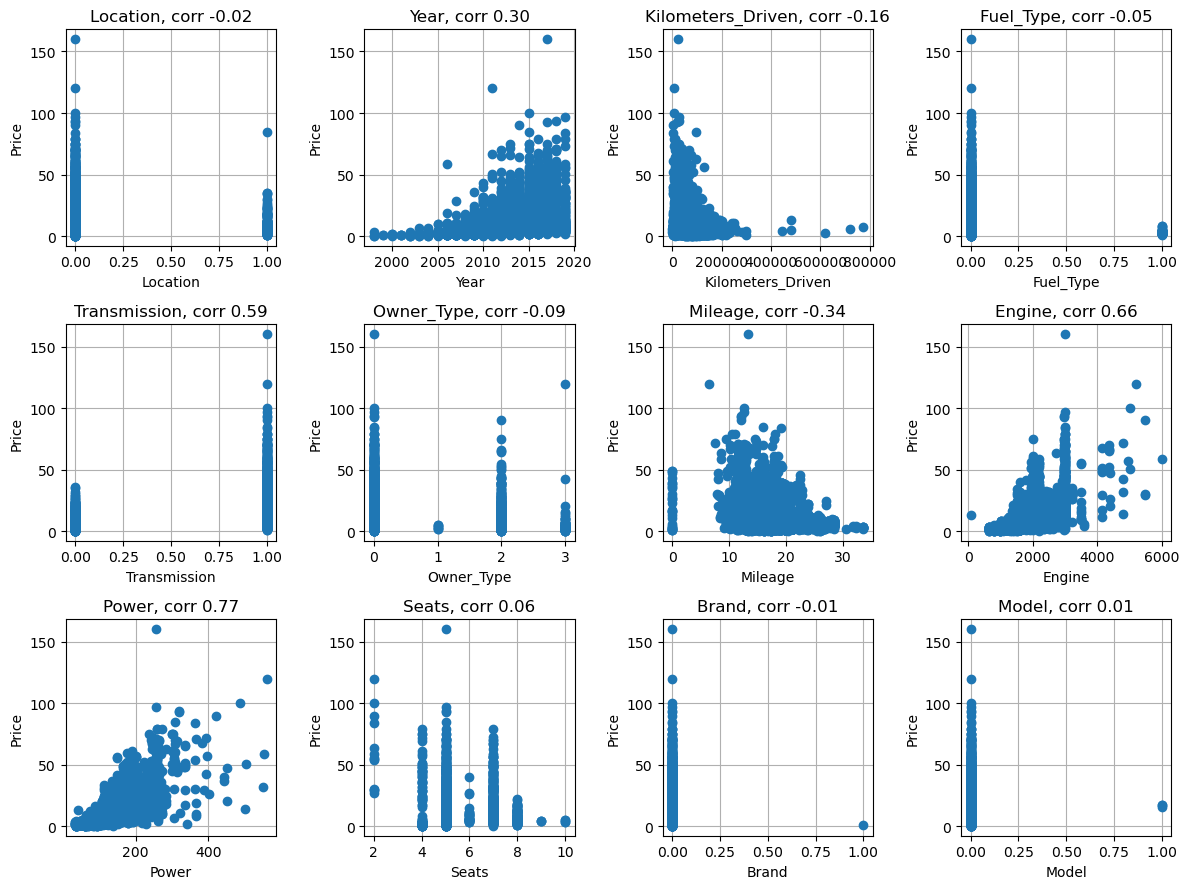

In [37]:
ts.plot_corr(newDF,featureDF.columns,'Price')

In [38]:
newDF['Kilometers_Driven'].describe()

count      5875.000000
mean      57223.805106
std       37757.900335
min         171.000000
25%       33437.500000
50%       52600.000000
75%       72394.500000
max      775000.000000
Name: Kilometers_Driven, dtype: float64

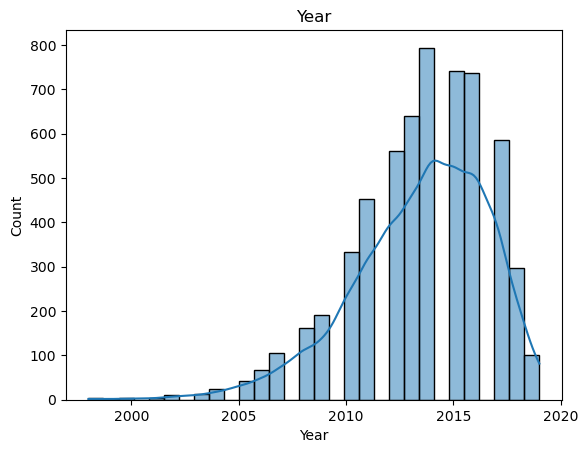

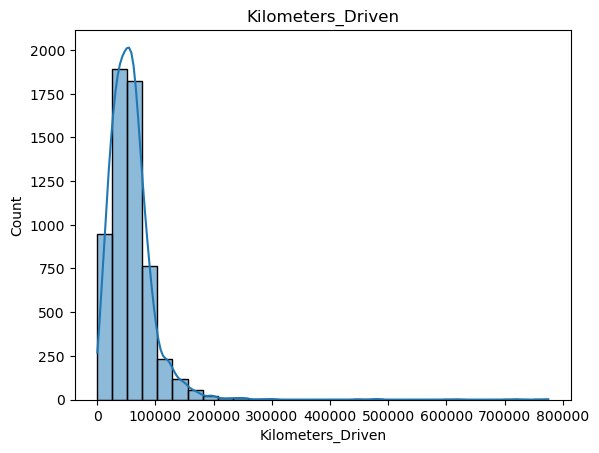

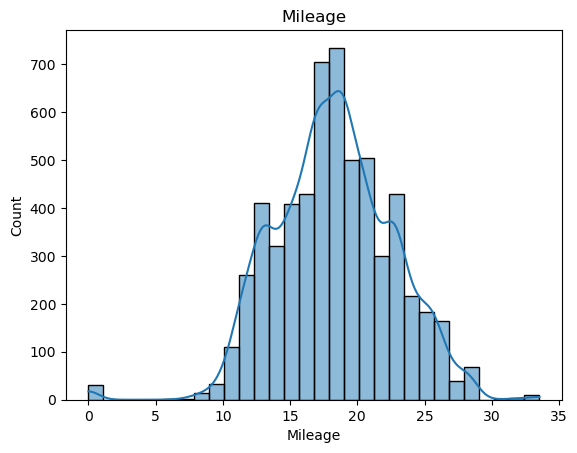

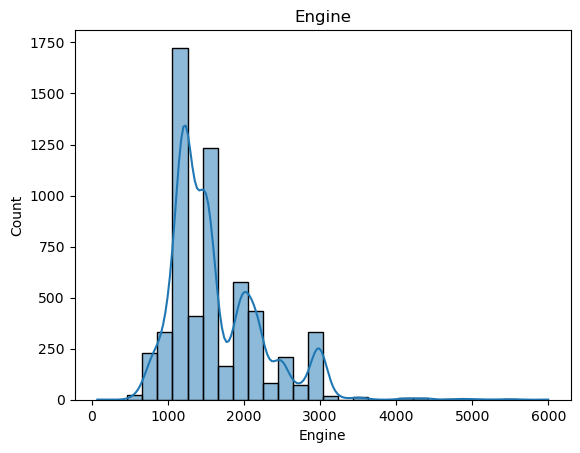

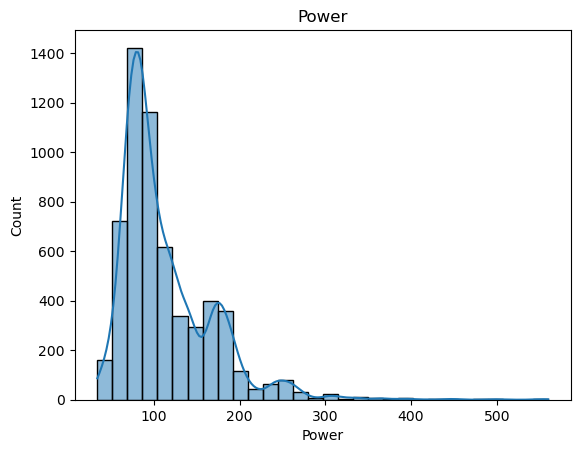

In [39]:
for i in ['Year', 'Kilometers_Driven','Mileage', 'Engine', 'Power']:
    sns.histplot(newDF[i], kde=True, bins=30)
    plt.title(i)
    plt.show()

In [40]:
#['Year', 'Kilometers_Driven','Mileage', 'Engine', 'Power']
# log       robust             standard     scipy.stats.boxcox         log

In [41]:
targetSR = newDF['Price']
featureDF = newDF[['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Brand', 'Model', 'Ageofcar']]

In [42]:
nModel = rm()

In [43]:
X_train, X_test, y_train, y_test =nModel.train_test_cut(featureDF,targetSR)

X_train => 2D (4406, 13) / X_test => 2D, (1469, 13)
y_train => 1D (4406,), / y_test => 1D, (1469,)


In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler,FunctionTransformer
lScaler = FunctionTransformer(np.log)
X_train['Year'] = lScaler.fit_transform(X_train[['Year']])
X_train['Power'] = lScaler.fit_transform(X_train[['Power']])
X_train['Kilometers_Driven'] = lScaler.fit_transform(X_train[['Kilometers_Driven']])
# rScaler = RobustScaler()


sScaler = StandardScaler()
X_train['Engine'] = sScaler.fit_transform(X_train[['Engine']])
X_train['Mileage'] = sScaler.fit_transform(X_train[['Mileage']])

In [45]:
nModel.lr(X_train, X_test, y_train, y_test)

(4406, 13) 2 D / 4406


,train_score,test_score,diff,train_loss,test_loss,coef,intercept
_utils.RegressionModule,0.129798,0.129798,0.0,1.303887,1.303887,"[-0.0579, -468975.8074, -1.0387, 1.4888, 4.365...",3.570485e+06


In [46]:
train_stotal , test_stotal = 0, 0
train_ltotal, test_ltotal = 0, 0

resultDF = pd.DataFrame(columns = ['train_score', 'test_score','diff', 'train_loss', 'test_loss', 'coef','intercept'])

model = LinearRegression()

train_data, train_label = X_train, y_train      
test_data, test_label = X_train, y_train
#학습

print(train_data.shape,train_data.ndim,'D','/', len(train_label))

model.fit(train_data, train_label)

train_score = model.score(train_data, train_label)
test_score = model.score(test_data, test_label)

train_loss = root_mean_squared_error(train_label, model.predict(train_data))
test_loss = root_mean_squared_error(test_label, model.predict(test_data))

coef = model.coef_
intercept = model.intercept_

train_stotal += train_score
test_stotal += test_score
train_ltotal += train_loss
test_ltotal += test_loss

resultDF.loc[0] = [train_stotal/5,test_stotal/5,train_stotal/5-test_stotal/5,train_ltotal/5,test_ltotal/5, coef.round(4), intercept]
resultDF

(4406, 13) 2 D / 4406


,train_score,test_score,diff,train_loss,test_loss,coef,intercept
0,0.129798,0.129798,0.0,1.303887,1.303887,"[-0.0579, -468975.8074, -1.0387, 1.4888, 4.365...",3.570485e+06


In [47]:
x = X_train
w = model.coef_[0]
y = (1*model.coef_[0]) + (x * model.coef_[1]) + ((x**2)*model.coef_[2]) + model.intercept_
# y = np.dot(x, w) + model.intercept_

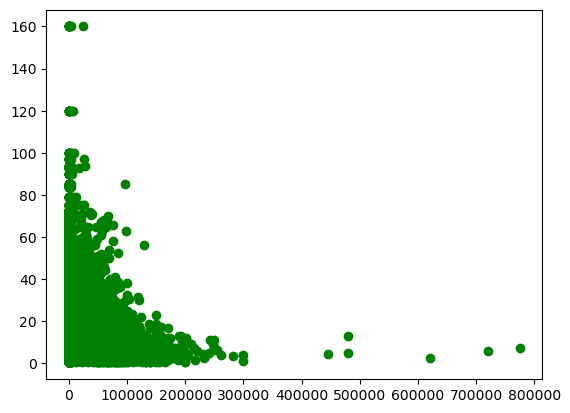

In [48]:
plt.plot(featureDF, targetSR,'og', label = 'DATA')
# plt.plot(x,y)

In [49]:
targetSR = newDF['Price']
featureDF = newDF[['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Brand', 'Model', 'Ageofcar']]

In [50]:
nModel = rm()

In [51]:
X_train, X_test, y_train, y_test =nModel.train_test_cut(featureDF,targetSR)

X_train => 2D (4406, 13) / X_test => 2D, (1469, 13)
y_train => 1D (4406,), / y_test => 1D, (1469,)


In [52]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler,FunctionTransformer
lScaler = FunctionTransformer(np.log)
X_train['Year'] = lScaler.fit_transform(X_train[['Year']])
X_train['Power'] = lScaler.fit_transform(X_train[['Power']])
X_train['Kilometers_Driven'] = lScaler.fit_transform(X_train[['Kilometers_Driven']])
# rScaler = RobustScaler()


sScaler = StandardScaler()
X_train['Engine'] = sScaler.fit_transform(X_train[['Engine']])

In [53]:
nModel.lr(X_train, X_test, y_train, y_test)

(4406, 13) 2 D / 4406


,train_score,test_score,diff,train_loss,test_loss,coef,intercept
_utils.RegressionModule,0.129798,0.129798,0.0,1.303887,1.303887,"[-0.0579, -468975.8074, -1.0387, 1.4888, 4.365...",3.570484e+06


In [54]:
train_stotal , test_stotal = 0, 0
train_ltotal, test_ltotal = 0, 0

resultDF = pd.DataFrame(columns = ['train_score', 'test_score','diff', 'train_loss', 'test_loss', 'coef','intercept'])

model = LinearRegression()

train_data, train_label = X_train, y_train      
test_data, test_label = X_train, y_train
#학습

print(train_data.shape,train_data.ndim,'D','/', len(train_label))

model.fit(train_data, train_label)

train_score = model.score(train_data, train_label)
test_score = model.score(test_data, test_label)

train_loss = root_mean_squared_error(train_label, model.predict(train_data))
test_loss = root_mean_squared_error(test_label, model.predict(test_data))

coef = model.coef_
intercept = model.intercept_

train_stotal += train_score
test_stotal += test_score
train_ltotal += train_loss
test_ltotal += test_loss

resultDF.loc[0] = [train_stotal,test_stotal,train_stotal-test_stotal,train_ltotal,test_ltotal, coef.round(4), intercept]
resultDF

(4406, 13) 2 D / 4406


,train_score,test_score,diff,train_loss,test_loss,coef,intercept
0,0.64899,0.64899,0.0,6.519436,6.519436,"[-0.0579, -468975.8074, -1.0387, 1.4888, 4.365...",3.570484e+06


In [55]:
x = X_train
w = model.coef_[0]
# y = (1*model.coef_[0]) + (x * model.coef_[1]) + ((x**2)*model.coef_[2]) + model.intercept_
y = np.dot(x, w) + model.intercept_

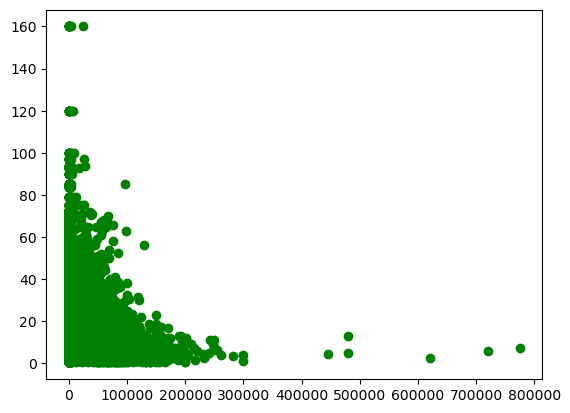

In [56]:
plt.plot(featureDF, targetSR,'og', label = 'DATA')
# plt.plot(x,y)

In [57]:
targetSR = newDF['Price']
featureDF = newDF[[ 'Year','Transmission','Mileage', 'Engine', 'Power']]

In [58]:
# nModel = rm()

In [59]:
X_train, X_test, y_train, y_test =nModel.train_test_cut(featureDF,targetSR)

X_train => 2D (4406, 5) / X_test => 2D, (1469, 5)
y_train => 1D (4406,), / y_test => 1D, (1469,)


In [60]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler,FunctionTransformer
lScaler = FunctionTransformer(np.log)
X_train['Year'] = lScaler.fit_transform(X_train[['Year']])
X_train['Power'] = lScaler.fit_transform(X_train[['Power']])
# X_train['Kilometers_Driven'] = lScaler.fit_transform(X_train[['Kilometers_Driven']])
# rScaler = RobustScaler()


sScaler = StandardScaler()
X_train['Engine'] = sScaler.fit_transform(X_train[['Engine']])
X_train['Mileage'] = sScaler.fit_transform(X_train[['Mileage']])

In [61]:
X_test['Year'] = lScaler.fit_transform(X_test[['Year']])
X_test['Power'] = lScaler.fit_transform(X_test[['Power']])
# X_test['Kilometers_Driven'] = lScaler.fit_transform(X_test[['Kilometers_Driven']])
# rScaler = RobustScaler()


sScaler = StandardScaler()
X_test['Engine'] = sScaler.fit_transform(X_test[['Engine']])
X_test['Mileage'] = sScaler.fit_transform(X_test[['Mileage']])

In [62]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
## 하이퍼파라미터 dict
# param = {'penalty': ['l1', 'l2', 'elasticnet', None], 'solver':['sag']}
#  error_score='raise'.

param = {}
# param = {'penalty': ['l2'], 'solver':['liblinear']}
# param = {'penalty': ['l2',  None]}

# 패널티와  solver의 조합 찾기.

## 모델 인스턴스 생성
model = LinearRegression()

## 교차검증고 ㅏ튜닝 진행 인스턴스 생성
gridCV = GridSearchCV(model, param, refit=True)

In [63]:
poly_features = PolynomialFeatures(degree=2) 
X_poly = poly_features.fit_transform(X_train)
X_poly_test = poly_features.fit_transform(X_test)

gridCV.fit(X_poly,y_train)

GridSearchCV(estimator=LinearRegression(), param_grid={})

In [64]:
gridCV.cv_results_

{'mean_fit_time': array([0.00167999]),
 'std_fit_time': array([0.00117331]),
 'mean_score_time': array([0.0016746]),
 'std_score_time': array([0.00148931]),
 'params': [{}],
 'split0_test_score': array([0.83274932]),
 'split1_test_score': array([0.842596]),
 'split2_test_score': array([0.78614896]),
 'split3_test_score': array([0.78444344]),
 'split4_test_score': array([0.75265924]),
 'mean_test_score': array([0.79971939]),
 'std_test_score': array([0.03335131]),
 'rank_test_score': array([1], dtype=int32)}

In [65]:
## 교차 검증 및 튜닝 후 결과
print(f" 가장 좋은 성능의 cv번호: {gridCV.best_index_}")
print(f" 가장 좋은 성능의 하이퍼 파라미터 조합:  {gridCV.best_params_}")
print(f" 가장 좋은 성능의 점수: {gridCV.best_score_}")
print(f" 가장 좋은 성능의 재학습된 모델객체:  {gridCV.best_estimator_}")


 가장 좋은 성능의 cv번호: 0
 가장 좋은 성능의 하이퍼 파라미터 조합:  {}
 가장 좋은 성능의 점수: 0.7997193904196357
 가장 좋은 성능의 재학습된 모델객체:  LinearRegression()


In [66]:
## 가장 좋은 모델 선정
bestModel = gridCV.best_estimator_

bestModel.fit(X_poly, y_train)

LinearRegression()

In [67]:
print(bestModel.score(X_poly,y_train))
print(bestModel.score(X_poly_test,y_test))

0.8031969180653054
0.8294958149368048


In [68]:
# 

In [69]:
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# ## 하이퍼파라미터 dict
# # param = {'penalty': ['l1', 'l2', 'elasticnet', None], 'solver':['sag']}
# #  error_score='raise'.

# param = {}
# # param = {'penalty': ['l2'], 'solver':['liblinear']}
# # param = {'penalty': ['l2',  None]}

# # 패널티와  solver의 조합 찾기.

# ## 모델 인스턴스 생성
# model = Lasso()

# ## 교차검증고 ㅏ튜닝 진행 인스턴스 생성
# gridCV = GridSearchCV(model, param, refit=True)

In [70]:
# # poly_features = PolynomialFeatures(degree=2) 
# # X_poly = poly_features.fit_transform(X_train)
# # X_poly_test = poly_features.fit_transform(X_test)

# gridCV.fit(X_train,y_train)

In [71]:
# gridCV.cv_results_

In [72]:
# ## 교차 검증 및 튜닝 후 결과
# print(f" 가장 좋은 성능의 cv번호: {gridCV.best_index_}")
# print(f" 가장 좋은 성능의 하이퍼 파라미터 조합:  {gridCV.best_params_}")
# print(f" 가장 좋은 성능의 점수: {gridCV.best_score_}")
# print(f" 가장 좋은 성능의 재학습된 모델객체:  {gridCV.best_estimator_}")


In [73]:
# ## 가장 좋은 모델 선정
# bestModel = gridCV.best_estimator_

# bestModel.fit(X_train, y_train)

In [74]:
# print(bestModel.score(X_train,y_train))
# print(bestModel.score(xte,y_test))

In [75]:
newDF.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Brand', 'Model', 'Ageofcar'],
      dtype='object')

In [76]:
targetSR1 = newDF['Price']
featureDF1 = newDF[[ 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
        'Brand', 'Model', 'Ageofcar']]

In [77]:
nModel = rm()

In [78]:
X_train, X_test, y_train, y_test =nModel.train_test_cut(featureDF1,targetSR1,RandomState=42)

X_train => 2D (4406, 13) / X_test => 2D, (1469, 13)
y_train => 1D (4406,), / y_test => 1D, (1469,)


In [79]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler,FunctionTransformer
lScaler = FunctionTransformer(np.log)
X_train['Year'] = lScaler.fit_transform(X_train[['Year']])
X_train['Power'] = lScaler.fit_transform(X_train[['Power']])
X_train['Kilometers_Driven'] = lScaler.fit_transform(X_train[['Kilometers_Driven']])
# rScaler = RobustScaler()


sScaler = StandardScaler()
X_train['Engine'] = sScaler.fit_transform(X_train[['Engine']])
X_train['Mileage'] = sScaler.fit_transform(X_train[['Mileage']])

In [80]:
X_train

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand,Model,Ageofcar
S.No.,,,,,,,,,,,,,
1071,0.0,7.609367,11.470039,0.0,0.0,2.0,1.728068,-0.221859,4.595120,5.0,0.0,0.0,8
4847,0.0,7.607381,10.398397,0.0,0.0,0.0,0.258694,-0.717683,4.463607,5.0,0.0,0.0,12
4944,0.0,7.607878,12.190959,0.0,0.0,0.0,1.172768,-0.635046,4.304065,5.0,0.0,0.0,11
5202,0.0,7.606387,12.206073,0.0,0.0,0.0,-1.249527,1.424277,4.624973,7.0,0.0,0.0,14
4285,0.0,7.605890,11.042746,0.0,0.0,0.0,-0.289750,-0.719336,4.382027,5.0,0.0,0.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3872,0.0,7.604894,10.545341,0.0,0.0,0.0,0.327250,-1.382088,3.835142,5.0,0.0,0.0,17
5321,0.0,7.607878,10.453630,0.0,0.0,0.0,-0.723935,-0.720989,4.290459,7.0,0.0,0.0,11
5356,0.0,7.604894,11.141862,0.0,0.0,0.0,-0.129787,-0.223512,4.356709,5.0,0.0,0.0,17


In [81]:
resultDF = pd.DataFrame(columns = ['alpha','train_score', 'test_score','diff', 'train_loss', 'test_loss', 'coef','intercept'])
alphaList1 = [0.1, 0.5, 1.0, 1.5, 2, 2.5, 3, 5, 10, 50, 100]
kf = KFold(n_splits=5)
## alpha값에 따른 Ridge 모델 성능 비교
type = 'rid'
for alpha in alphaList1:
    if type == 'rid':
        # print('Ridge')
        model = Ridge(alpha)
    elif type == 'las':
        # print('Lasso')
        model = Lasso(alpha,max_iter=5000, tol=1e-10)
    elif type == 'ela':
        # print('ElasticNet')
        model = ElasticNet(alpha)
    
    train_stotal , test_stotal = 0, 0
    train_ltotal, test_ltotal = 0, 0
        
    for i, (train_index, test_index) in enumerate(kf.split(X_train, y_train)):
        # print(train_index, test_index)
        ## 학습용 / 테스트용 피쳐와 타겟 추출
        train_data, train_label = X_train.iloc[train_index], y_train.iloc[train_index]
        test_data, test_label = X_train.iloc[test_index], y_train.iloc[test_index]

        #학습
        # print(train_data.shape,train_data.ndim,'D','/', len(train_label))
        model.fit(train_data, train_label)
        
        train_score = model.score(train_data, train_label)
        test_score = model.score(test_data, test_label)

        train_loss = root_mean_squared_error(train_label, model.predict(train_data))
        test_loss = root_mean_squared_error(test_label, model.predict(test_data))

        coef = model.coef_
        intercept = model.intercept_
        train_stotal += train_score
        test_stotal += test_score
        train_ltotal += train_loss
        test_ltotal += test_loss
    #alpha값 별로 성능과 손실값 평균 저장하기    
    resultDF.loc[alpha] = [alpha, train_stotal/5,test_stotal/5,train_stotal/5-test_stotal/5,train_ltotal/5,test_ltotal/5, coef.round(4), intercept]
# print(resultDF)

In [82]:
resultDF

,alpha,train_score,test_score,diff,train_loss,test_loss,coef,intercept
0.1,0.1,0.660389,0.660230,0.000159,6.789231,6.786100,"[-0.1654, -0.0626, -1.5936, 1.9866, 3.984, -0....",18.303345
0.5,0.5,0.660362,0.660239,0.000124,6.789498,6.786012,"[-0.1646, -0.0122, -1.5942, 1.9577, 3.9872, -0...",18.113495
1.0,1.0,0.660325,0.660243,0.000082,6.789866,6.785969,"[-0.1635, -0.0059, -1.5943, 1.9242, 3.9896, -0...",18.236350
1.5,1.5,0.660295,0.660244,0.000051,6.790166,6.785954,"[-0.1623, -0.0038, -1.5941, 1.8926, 3.9913, -0...",18.355928
2.0,2.0,0.660271,0.660244,0.000027,6.790406,6.785952,"[-0.1612, -0.0027, -1.5937, 1.8623, 3.9927, -0...",18.465431
2.5,2.5,0.660252,0.660244,0.000008,6.790600,6.785955,"[-0.1601, -0.0021, -1.5932, 1.8331, 3.9939, -0...",18.567405
3.0,3.0,0.660235,0.660243,-0.000007,6.790761,6.785963,"[-0.159, -0.0017, -1.5926, 1.8049, 3.995, -0.1...",18.663924
5.0,5.0,0.660189,0.660237,-0.000048,6.791222,6.786013,"[-0.1548, -0.0008, -1.5901, 1.7002, 3.9986, -0...",19.016596
10.0,10.0,0.660117,0.660212,-0.000095,6.791942,6.786234,"[-0.1455, -0.0002, -1.5834, 1.4838, 4.0046, -0...",19.781603
50.0,50.0,0.659530,0.659736,-0.000206,6.797797,6.790837,"[-0.1015, 0.0004, -1.5316, 0.7189, 3.9855, -0....",23.704269


In [83]:
newDF = newDF.drop(columns='Name')

In [84]:
targetSR1 = newDF['Price']
featureDF1 = newDF[[ 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
        'Brand', 'Model', 'Ageofcar']]

In [85]:
nModel = rm()

In [86]:
X_train, X_test, y_train, y_test =nModel.train_test_cut(featureDF1,targetSR1,RandomState=42)

X_train => 2D (4406, 13) / X_test => 2D, (1469, 13)
y_train => 1D (4406,), / y_test => 1D, (1469,)


In [87]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler,FunctionTransformer
lScaler = FunctionTransformer(np.log)
X_train['Year'] = lScaler.fit_transform(X_train[['Year']])
X_train['Power'] = lScaler.fit_transform(X_train[['Power']])
X_train['Kilometers_Driven'] = lScaler.fit_transform(X_train[['Kilometers_Driven']])
# rScaler = RobustScaler()

sScaler = StandardScaler()
X_train['Engine'] = sScaler.fit_transform(X_train[['Engine']])
X_train['Mileage'] = sScaler.fit_transform(X_train[['Mileage']])

In [88]:
X_test['Year'] = lScaler.fit_transform(X_test[['Year']])
X_test['Power'] = lScaler.fit_transform(X_test[['Power']])
X_test['Kilometers_Driven'] = lScaler.fit_transform(X_test[['Kilometers_Driven']])
# rScaler = RobustScaler()

sScaler = StandardScaler()
X_test['Engine'] = sScaler.fit_transform(X_test[['Engine']])
X_test['Mileage'] = sScaler.fit_transform(X_test[['Mileage']])

In [89]:
# %pip install statsmodels

In [90]:
import statsmodels.api as sm

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
y_train

In [ ]:
# X_train = sm.add_constant(X_train)
# # Add constant to test data
# X_test = sm.add_constant(X_test)
# olsmodel1 = sm.OLS(y_train, X_train[X_train.columns])

# print(olsmodel1.summary())

In [ ]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)  # 모델 평가 시 필요하면 추가

def build_ols_model(train):
    # Create the model
    olsmodel = sm.OLS(y_train, train)
    return olsmodel.fit()
ols_M1 = build_ols_model(X_train)
print(ols_M1.summary())

# olsmodel = sm.OLS(y_train, X_train)
# ols_M1 = olsmodel.fit()  # 모델 학습

# print(ols_M1.summary())  # 학습 결과 출력

In [ ]:
print(ols_M1.params.shape)

In [ ]:
import math

# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # Insample Prediction
    y_pred_train_pricelog = olsmodel.predict(x_train)
    y_pred_train_Price = y_pred_train_pricelog.apply(math.exp)
    y_train_Price = y_train

    # Prediction on test data
    y_pred_test_pricelog = olsmodel.predict(x_test)
    y_pred_test_Price = y_pred_test_pricelog.apply(math.exp)
    y_test_Price = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train_Price, y_train_Price),
                    rmse(y_pred_test_Price, y_test_Price),
                ],
                "MAE": [
                    mae(y_pred_train_Price, y_train_Price),
                    mae(y_pred_test_Price, y_test_Price),
                ],
                "MAPE": [
                    mape(y_pred_train_Price, y_train_Price),
                    mape(y_pred_test_Price, y_test_Price),
                ],
            }
        )
    )


# Checking model performance
model_pref(ols_M1, X_train, X_test)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif

In [ ]:
print(checking_vif(X_train))

In [ ]:
X_train1=X_train.drop(['Engine'],axis=1)
X_test1=X_test.drop(['Engine'],axis=1)
olsmodel2= build_ols_model(X_train1)

print(olsmodel2.summary())

# Checking model performance
model_pref(olsmodel2, X_train1, X_test1)

In [ ]:
print(checking_vif(X_train1))

In [ ]:
residuals = olsmodel2.resid
np.mean(residuals)

In [ ]:

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residuals, X_train1)
lzip(name, test)

In [ ]:
olsmodel2

In [ ]:
# predicted values
fitted = olsmodel2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(fitted, residuals, color="purple", lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

In [ ]:
# Plot q-q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

In [ ]:
print(olsmodel2.summary())
# Checking model performance
model_pref(olsmodel2, X_train1, X_test1)

In [ ]:
# 환율 (예시: 1 INR = 15 KRW)
exchange_rate = 16.75

# 중고차 가격을 한국 원화로 변환 후 백만 원 단위로 변환
# car_df['Price'] = (car_df['Price'] * 100000 * exchange_rate) / 1000000

# # 결과 출력
# print(car_df[['Price']])